# HW 1

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [46]:
diamonds_df = pd.read_csv('diamonds.csv')

In [47]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


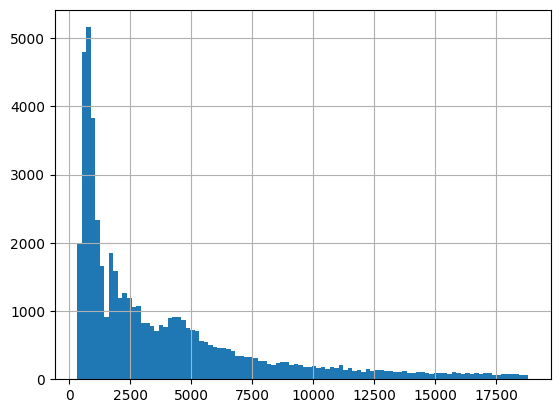

In [48]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid()

# Подготовка данных

In [49]:
features = ['carat', 'cut', 'color',
            'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [50]:
cut_transform = {'Fair': 0, 'Good': 1,
                 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2,
                     'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [51]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(
    lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(
    lambda x: clarity_transform.get(x))

In [52]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=47, test_size=0.3)

In [54]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [55]:
reg = LinearRegression().fit(X_train, y_train)

In [56]:
y_pred = reg.predict(X_test)

In [57]:
score = r2_score(y_pred, y_test)

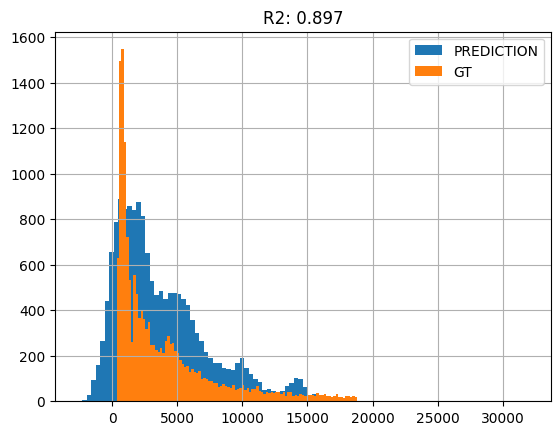

In [58]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [59]:
from typing import Self, Literal
import numpy as np


class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(
            self: Self,
            *,
            learning_rate: float = 0.01,
            n_iter: int = 1000,
            random_state: int | None = None
    ):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
            random_state (int | None): Запоминаем зерно 
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state

        # private
        self._coef = None  # Веса
        self._intercept = 0.0  # Смещение

        self.fixedGenerator = np.random.default_rng(self.random_state)

    def fit(self: Self, X: np.ndarray, y: np.ndarray):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        xIn = np.asarray(X)
        yIn = np.asarray(y).reshape(-1)

        rows = xIn.shape[0]
        cols = xIn.shape[1]

        self._coef = self.fixedGenerator.normal(0, 1, size=cols)
        self._intercept = 0.0

        for epoch in range(self.n_iter):
            yValue = xIn.dot(self._coef) + self._intercept
            error = yValue - yIn

            gradientWeights = (2/rows) * xIn.T.dot(error)  # по весам
            gradientIntercept = (2/rows) * np.sum(error)  # по смещению

            self._coef -= self.learning_rate * gradientWeights
            self._intercept -= self.learning_rate * gradientIntercept
        
        return self

    def predict(self: Self, X: np.ndarray):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        xIn = np.asarray(X)
        return xIn.dot(self._coef) + self._intercept

    def get_params(self: Self):
        """
        Возвращает обученные параметры модели
        """
        return {"coef": self._coef.copy(), "intercept": float(self._intercept)}

In [60]:
reg = LinearRegressorGD(n_iter = 10000).fit(X_train, y_train)

In [61]:
y_pred = reg.predict(X_test)

In [62]:
score = r2_score(y_pred, y_test)

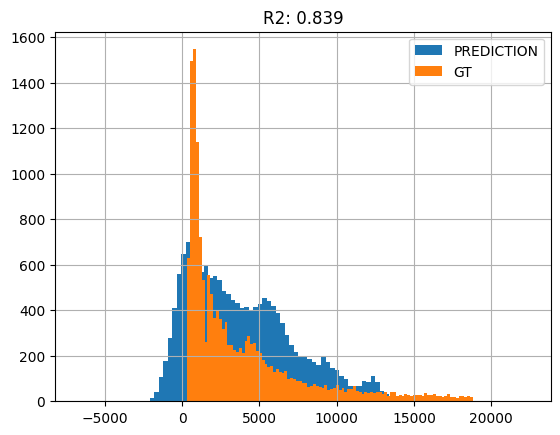

In [63]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()

# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [64]:
from typing import Self, Literal
import numpy as np


class MYMLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(
            self: Self,
            *,
            hidden_layer_sizes: tuple[int, ...] = (100,),
            learning_rate: float = 0.01,
            n_iter: int = 100,
            random_state: int | None = None
    ):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        self.fixedGenerator = np.random.default_rng(self.random_state)

        # Храним данные по прямым проходам

        self.weights: list[np.ndarray] = []
        self.bias: list[np.ndarray] = []
        self.linear_sum: list[np.ndarray] = []
        self.activation: list[np.ndarray] = []  # включая A_0 = X

    def _initialize_weights(self: Self, n_features: int, n_outputs: int):
        self.weights.clear()
        self.bias.clear()

        layer_sizes: list = [n_features] + \
            list(self.hidden_layer_sizes) + [n_outputs]

        for i in range(len(layer_sizes) - 1):
            inSz = layer_sizes[i]
            outSz = layer_sizes[i+1]
            W = self.fixedGenerator.normal(0, 1, size=(inSz, outSz))
            b = np.zeros((1, outSz), dtype=float)

            self.weights.append(W)
            self.bias.append(b)

    def _sigmoid(self: Self, x: np.ndarray):
        x = np.clip(x, -500.0, 500.0)
        return 1.0 / (1.0 + np.exp(-x))

    def forward(self: Self, X: np.ndarray):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        X = np.asarray(X, dtype=float)

        self.activation.clear()
        self.linear_sum.clear()

        A = X
        self.activation.append(A)

        # Скрытые слои
        for l in range(len(self.weights) - 1):
            Z = A.dot(self.weights[l]) + self.bias[l]
            self.linear_sum.append(Z)
            A = self._sigmoid(Z)
            self.activation.append(A)

        # Выходной слой
        Z_last = A.dot(self.weights[-1]) + self.bias[-1]
        self.linear_sum.append(Z_last)
        A_last = Z_last
        self.activation.append(A_last)

        return A_last

    def backward(self: Self, X: np.ndarray, y: np.ndarray):
        """
        Реализация backward pass

        Возвращает:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """

        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float).reshape(-1, 1)
        n = X.shape[0]

        y_pred = self.activation[-1]
        delta = (2.0 / n) * (y_pred - y)
        deltas: list[np.ndarray] = [delta]

        for l in reversed(range(len(self.weights) - 1)):
            W_l_next = self.weights[l + 1]
            A_l = self.activation[l + 1]  # со сдвигом т.к. включен A[0]

            dL_da = delta.dot(W_l_next.T)
            sigma_deriv = A_l * (1.0 - A_l)
            delta = dL_da * sigma_deriv
            deltas.append(delta)

        deltas.reverse()

        # Градиент
        for l in range(len(self.weights)):
            A_prev = self.activation[l]
            dL_dW = A_prev.T.dot(deltas[l])
            dL_db = np.sum(deltas[l], axis=0, keepdims=True)

            self.weights[l] -= self.learning_rate * dL_dW
            self.bias[l] -= self.learning_rate * dL_db

        loss = float(np.mean((y_pred - y) ** 2))

        return loss

    def fit(self: Self, X: np.ndarray, y: np.ndarray):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float).reshape(-1, 1)
        samples = X.shape[0]
        features = X.shape[1]

        self._initialize_weights(n_features=features, n_outputs=1)

        for i in range(self.n_iter):
            y_pred = self.forward(X)
            loss = self.backward(X, y)

        return self

    def predict(self: Self, X: np.ndarray):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        X = np.asarray(X, dtype=float)
        y_pred = self.forward(X)

        return y_pred.reshape(-1)

# MLPRegressor Sklearn

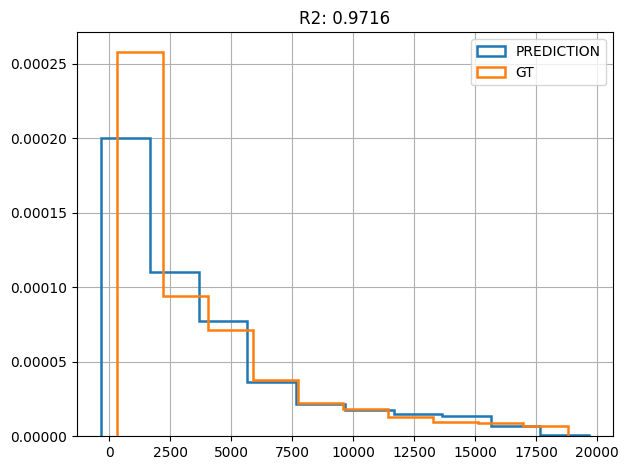

In [65]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("x_scaler", StandardScaler()),
    ("reg", TransformedTargetRegressor(
        regressor=MLPRegressor(
            hidden_layer_sizes=(10, 10),
            solver="sgd",
            activation="logistic",
            learning_rate_init=1e-2,
            learning_rate="adaptive",
            alpha=1e-5,
            max_iter=5000,
            early_stopping=True,
            n_iter_no_change=20,
            random_state=42
        ),
        transformer=StandardScaler()
    ))
])

pipe.fit(X_train, y_train.ravel())
y_pred_sk = pipe.predict(X_test)

score = r2_score(y_test, y_pred_sk)

y_pred = y_pred_sk.ravel()
y_true = y_test.ravel()


plt.figure()
plt.title(f'R2: {r2_score(y_true, y_pred):.4f}')

plt.hist(y_pred, histtype='step', linewidth=1.8, label='PREDICTION', density=True)
plt.hist(y_true, histtype='step', linewidth=1.8, label='GT', density=True)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MLPRegressor в рамках ДЗ

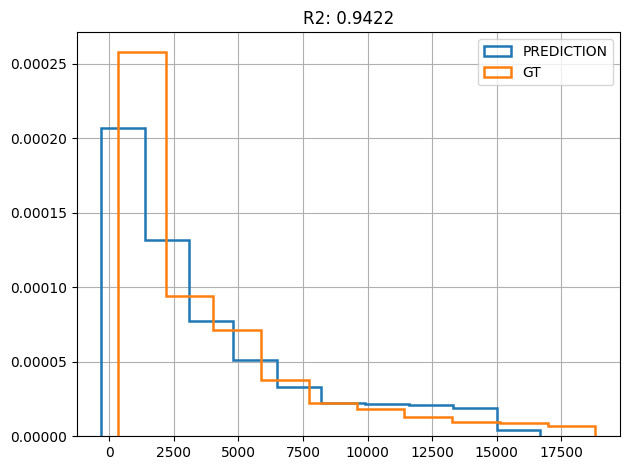

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()

X_test_scaled  = x_scaler.transform(X_test)
y_test_scaled  = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

mlp = MYMLPRegressor(
    hidden_layer_sizes=(10, 10),
    learning_rate=1e-2,
    n_iter=5000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = mlp.predict(X_test_scaled)

# Обратное преобразование к исходной шкале
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = y_test.ravel()

score = r2_score(y_true, y_pred)

plt.figure()
plt.title(f'R2: {score:.4f}')
plt.hist(y_pred, histtype='step', linewidth=1.8, label='PREDICTION', density=True)
plt.hist(y_true, histtype='step', linewidth=1.8, label='GT', density=True)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()